In [82]:
import pandas as pd
import matplotlib.pyplot as plt

 ### Concentración promedio anual por indicador, Calcula la concentración promedio anual por[mcg/m3] para cada indicador de contaminante.


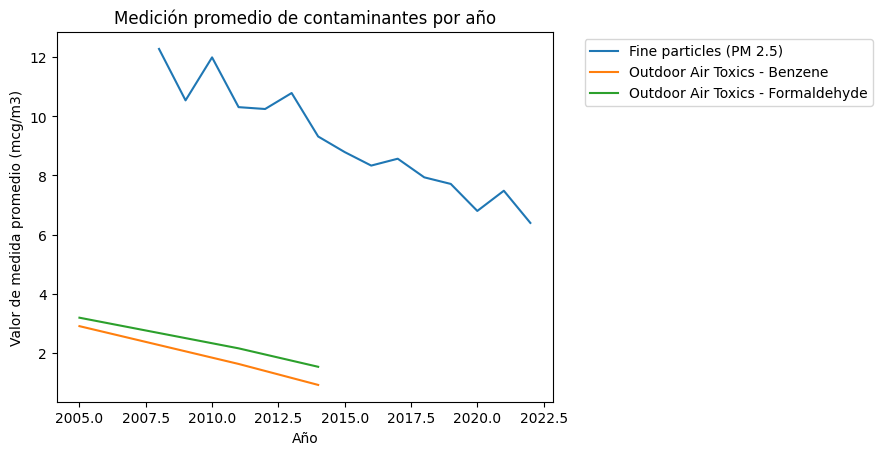

In [83]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar las filas donde la unidad de medida es 'mcg/m3' sin hacer copias
df_filtered = df.loc[df['unidad_de_medida'] == 'mcg/m3', ['contaminante', 'inicio_medicion', 'valor_medida']]

# Convertir la columna 'inicio_medicion' a tipo datetime
df_filtered['inicio_medicion'] = pd.to_datetime(df_filtered['inicio_medicion'])

# Extraer el año de la fecha de inicio de medición
df_filtered['anio'] = df_filtered['inicio_medicion'].dt.year

# Calcular el promedio de la medición por contaminante y año
df_avg = df_filtered.groupby(['contaminante', 'anio']).agg({'valor_medida': 'mean'}).reset_index()

# Crear un gráfico de líneas para cada contaminante
contaminantes = df_avg['contaminante'].unique()
for contaminante in contaminantes:
    df_contaminante = df_avg[df_avg['contaminante'] == contaminante]
    plt.plot(df_contaminante['anio'], df_contaminante['valor_medida'], label=contaminante)

# Añadir etiquetas
plt.xlabel('Año')
plt.ylabel('Valor de medida promedio (mcg/m3)')
plt.title('Medición promedio de contaminantes por año')

# Añadir la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


 ### Concentración promedio anual por indicador, Calcula la concentración promedio anual por [ppb] para cada indicador de contaminante.


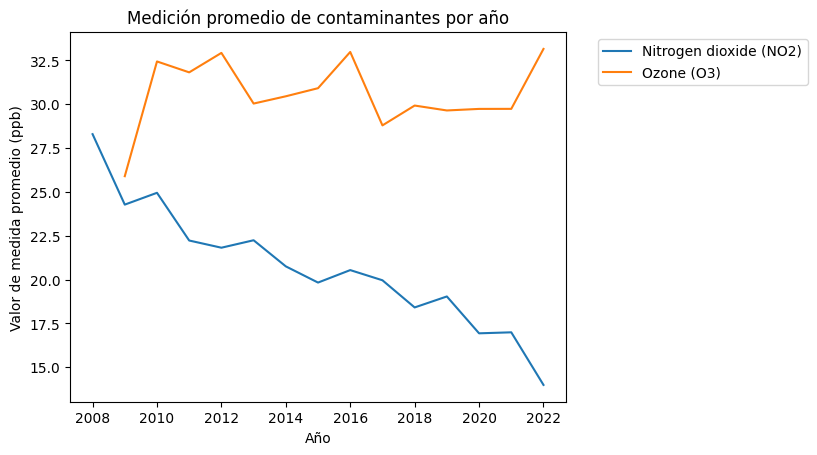

In [84]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar las filas donde la unidad de medida es 'ppb' sin hacer copias
df_filtered = df.loc[df['unidad_de_medida'] == 'ppb', ['contaminante', 'inicio_medicion', 'valor_medida']]

# Convertir la columna 'inicio_medicion' a tipo datetime
df_filtered['inicio_medicion'] = pd.to_datetime(df_filtered['inicio_medicion'])

# Extraer el año de la fecha de inicio de medición
df_filtered['anio'] = df_filtered['inicio_medicion'].dt.year

# Calcular el promedio de la medición por contaminante y año
df_avg = df_filtered.groupby(['contaminante', 'anio']).agg({'valor_medida': 'mean'}).reset_index()

# Crear un gráfico de líneas para cada contaminante
contaminantes = df_avg['contaminante'].unique()
for contaminante in contaminantes:
    df_contaminante = df_avg[df_avg['contaminante'] == contaminante]
    plt.plot(df_contaminante['anio'], df_contaminante['valor_medida'], label=contaminante)

# Añadir etiquetas
plt.xlabel('Año')
plt.ylabel('Valor de medida promedio (ppb)')
plt.title('Medición promedio de contaminantes por año')

# Añadir la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


 ### trancito promedio anual por vehiculo en millas cuadradas.

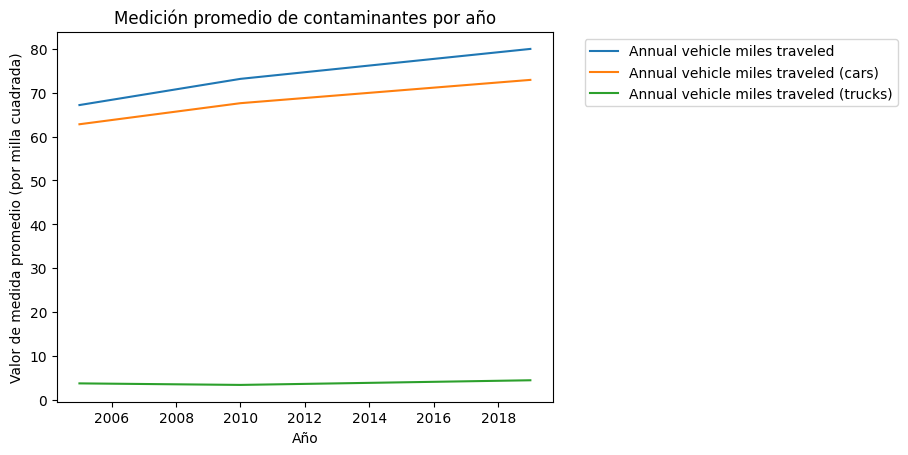

In [85]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar las filas donde la unidad de medida es 'per square mile' sin hacer copias
df_filtered = df.loc[df['unidad_de_medida'] == 'per square mile', ['contaminante', 'inicio_medicion', 'valor_medida']]

# Convertir la columna 'inicio_medicion' a tipo datetime
df_filtered['inicio_medicion'] = pd.to_datetime(df_filtered['inicio_medicion'])

# Extraer el año de la fecha de inicio de medición
df_filtered['anio'] = df_filtered['inicio_medicion'].dt.year

# Calcular el promedio de la medición por contaminante y año
df_avg = df_filtered.groupby(['contaminante', 'anio']).agg({'valor_medida': 'mean'}).reset_index()

# Crear un gráfico de líneas para cada contaminante
contaminantes = df_avg['contaminante'].unique()
for contaminante in contaminantes:
    df_contaminante = df_avg[df_avg['contaminante'] == contaminante]
    plt.plot(df_contaminante['anio'], df_contaminante['valor_medida'], label=contaminante)

# Añadir etiquetas
plt.xlabel('Año')
plt.ylabel('Valor de medida promedio (por milla cuadrada)')
plt.title('Medición promedio de contaminantes por año')

# Añadir la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()
